In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
exp = "full_state"
exp_results = pd.read_csv(f'{exp}.csv')
cmds = pd.read_csv(f'{exp}_cmds.csv')
gates = pd.read_csv(f'{exp}_gates.csv')

exp2 = "vel_compute"
exp_results2 = pd.read_csv(f'{exp2}.csv')
cmds2 = pd.read_csv(f'{exp2}_cmds.csv')
gates2 = pd.read_csv(f'{exp2}_gates.csv')

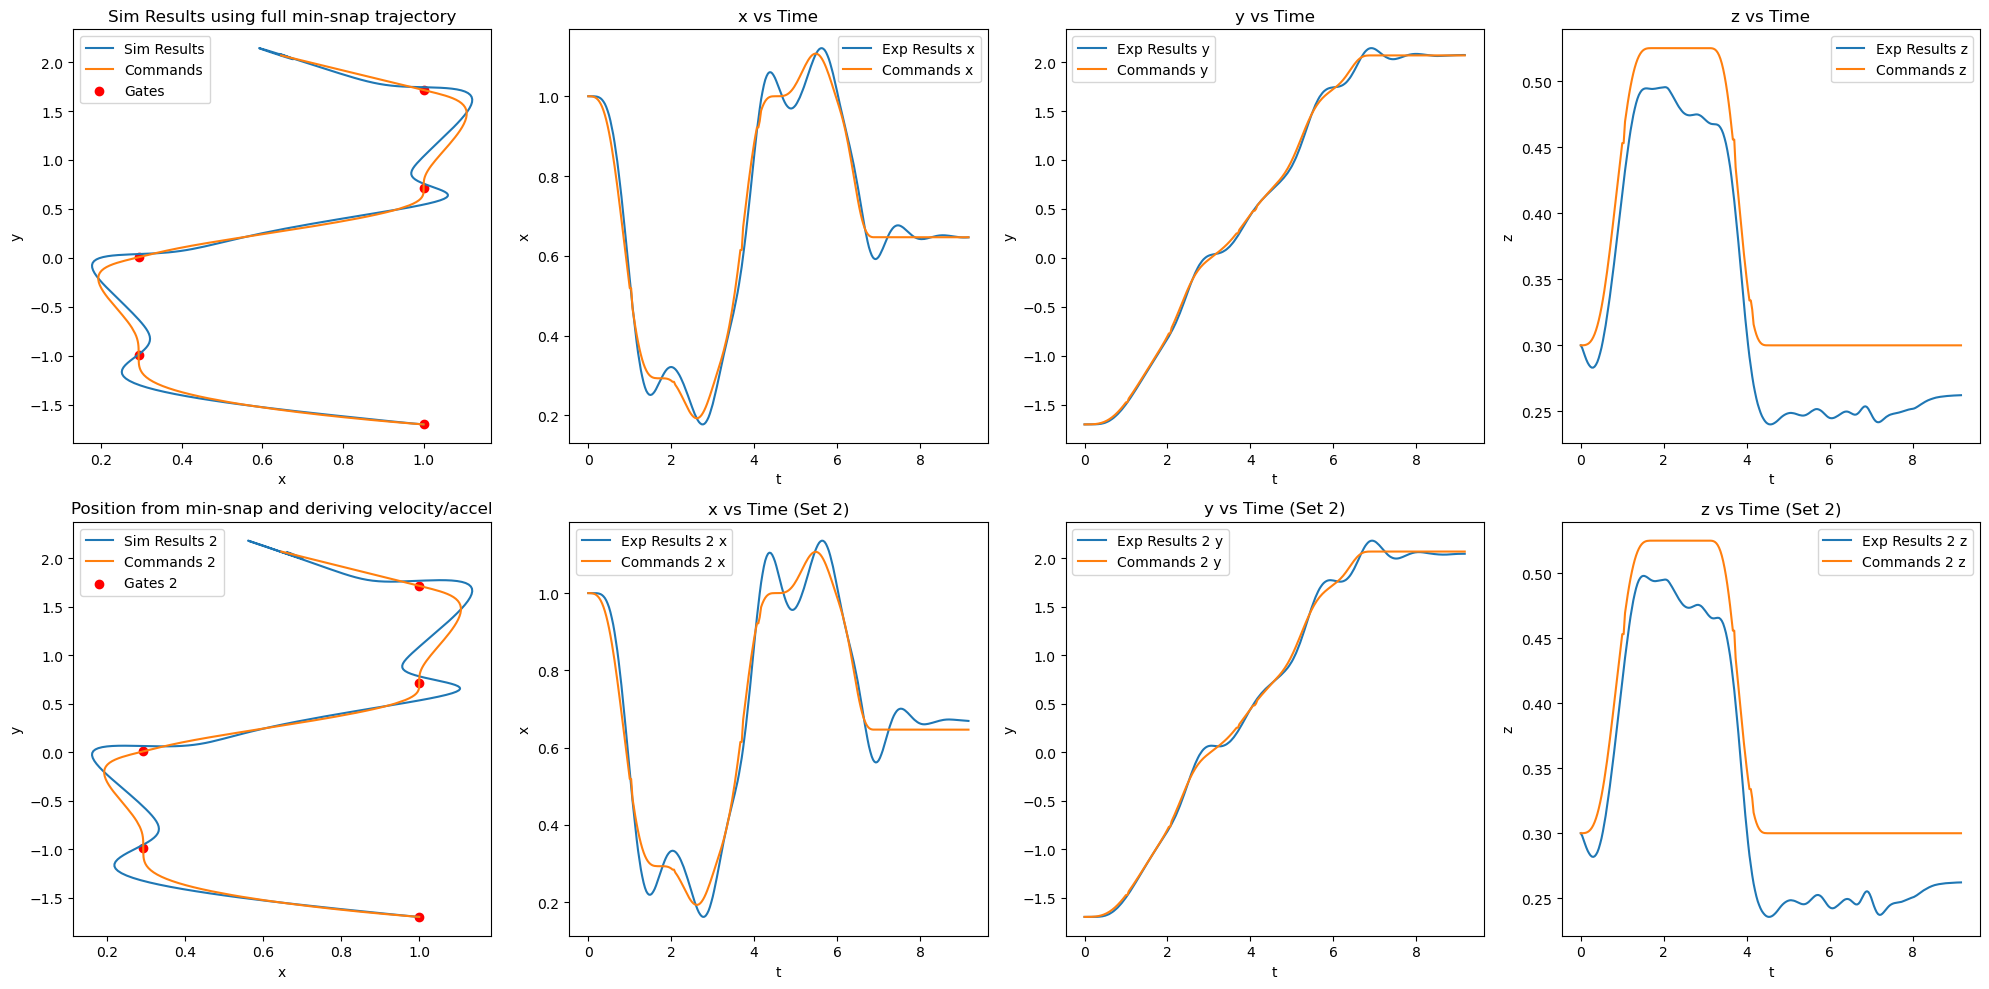

In [87]:
import matplotlib.pyplot as plt

# Create subplots: 2 rows, 4 columns
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# First row, first column: exp_results, cmds, gates
axs[0, 0].plot(exp_results["x"], exp_results["y"], label="Sim Results")
axs[0, 0].plot(cmds["x"], cmds["y"], label="Commands")
axs[0, 0].scatter(gates["gate_x"], gates["gate_y"], label="Gates", color="red")
axs[0, 0].legend()
axs[0, 0].set_title("Sim Results using full min-snap trajectory")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")

# Ensure the width is at least 0.5
x_min, x_max = axs[0, 0].get_xlim()
if (x_max - x_min) < 0.5:
    x_center = (x_max + x_min) / 2
    axs[0, 0].set_xlim(x_center - 0.25, x_center + 0.25)

# First row: x, y, z vs t for exp_results and cmds
for i, var in enumerate(['x', 'y', 'z'], start=1):
    axs[0, i].plot(exp_results['t'], exp_results[var], label=f"Exp Results {var}")
    axs[0, i].plot(cmds['t'], cmds[var], label=f"Commands {var}")
    axs[0, i].set_title(f"{var} vs Time")
    axs[0, i].set_xlabel("t")
    axs[0, i].set_ylabel(var)
    axs[0, i].legend()

# Second row, first column: exp_results2, cmds2, gates2
axs[1, 0].plot(exp_results2["x"], exp_results2["y"], label="Sim Results 2")
axs[1, 0].plot(cmds2["x"], cmds2["y"], label="Commands 2")
axs[1, 0].scatter(gates2["gate_x"], gates2["gate_y"], label="Gates 2", color="red")
axs[1, 0].legend()
axs[1, 0].set_title("Position from min-snap and deriving velocity/accel")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("y")

# Ensure the width is at least 0.5 for the second row
x_min2, x_max2 = axs[1, 0].get_xlim()
if (x_max2 - x_min2) < 0.5:
    x_center2 = (x_max2 + x_min2) / 2
    axs[1, 0].set_xlim(x_center2 - 0.25, x_center2 + 0.25)

# Second row: x, y, z vs t for exp_results2 and cmds2
for i, var in enumerate(['x', 'y', 'z'], start=1):
    axs[1, i].plot(exp_results2['t'], exp_results2[var], label=f"Exp Results 2 {var}")
    axs[1, i].plot(cmds2['t'], cmds2[var], label=f"Commands 2 {var}")
    axs[1, i].set_title(f"{var} vs Time (Set 2)")
    axs[1, i].set_xlabel("t")
    axs[1, i].set_ylabel(var)
    axs[1, i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


(208, 3)
(209, 3)


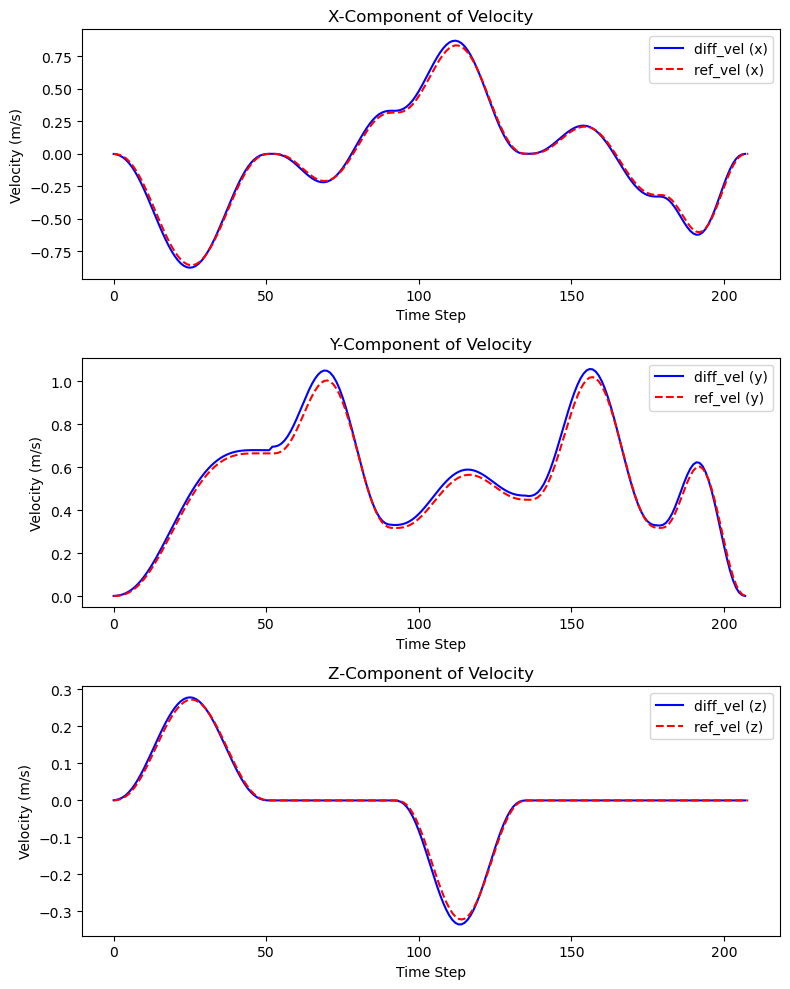

In [84]:
FREQ = 30
def calc_traj(sigma, T):
    M = np.array([
        [0, 0, 0, 0, 0, 0, 0, 1],
        [T**7, T**6, T**5, T**4, T**3, T**2, T**1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [7*T**6, 6*T**5, 5*T**4, 4*T**3, 3*T**2, 2*T, 1, 0],
        [0, 0, 0, 0, 0, 2, 0, 0],
        [42*T**5, 30*T**4, 20*T**3, 12*T**2, 6*T, 2, 0, 0],
        [0, 0, 0, 0, 6, 0, 0, 0],
        [210*T**4, 120*T**3, 60*T**2, 24*T, 6, 0, 0, 0],
    ])
    return np.linalg.inv(M) @ sigma
  
array = np.array
boundaries = [
    [0, array([ 1. , -1.7,  0.3]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), 0.7853981633974483],
    [1.8064153343439102, array([ 0.29289322, -0.99289322,  0.525     ]), array([0.        , 0.66361731, 0.        ]), array([0., 0., 0.]), array([0., 0., 0.]), 0.0],
    [1.3955321609973907, array([0.29289322, 0.00710678, 0.525     ]), array([0.31670479, 0.31670479, 0.        ]), array([0., 0., 0.]), array([0., 0., 0.]), -0.7853981633974482],
    [1.5298549085855484, array([1.        , 0.71421356, 0.3       ]), array([-4.97411804e-17,  4.48028723e-01,  0.00000000e+00]), array([0., 0., 0.]), array([0., 0., 0.]), 1.1102230246251565e-16],
    [1.4870948642492294, array([1.        , 1.71421356, 0.3       ]), array([-0.31687368,  0.31687368,  0.        ]), array([0., 0., 0.]), array([0., 0., 0.]), 0.7853981633974484],
    [1, array([0.64644661, 2.06776695, 0.3       ]), array([0., 0., 0.]), array([0., 0., 0.]), array([0., 0., 0.]), 0.7853981633974484]
]

ref_pos = [[], [], []]
ref_vel = [[], [], []]
ref_acc = [[], [], []]
ref_yaw = []
T = []

coeffs = [[], [], []]
Ts = []
Yaws = []

for index in range(len(boundaries) - 1):
    b_0 = boundaries[index]
    b_f = boundaries[index + 1]
    for xyz in range(3):
        sigma = np.array([b_0[1][xyz], b_f[1][xyz], b_0[2][xyz], b_f[2][xyz], b_0[3][xyz], b_f[3][xyz], b_0[4][xyz], b_f[4][xyz]])
        coeff = calc_traj(sigma, b_f[0])  
        coeffs[xyz].append(list(coeff))

        t = np.linspace(0, b_f[0], int(b_f[0] * FREQ))
        ref_pos[xyz] = np.append(ref_pos[xyz], np.polyval(coeff, t)[1:])
        ref_vel[xyz] = np.append(ref_vel[xyz], np.polyval(np.polyder(coeff, 1), t)[1:])
        ref_acc[xyz] = np.append(ref_acc[xyz], np.polyval(np.polyder(coeff, 2), t)[1:])
        
def compute_velocities(positions):
    # Time step between positions (in seconds)
    delta_t = 1/FREQ
    
    # Compute the difference between consecutive positions for each dimension
    delta_x = np.diff(positions[0])
    delta_y = np.diff(positions[1])
    delta_z = np.diff(positions[2])
    
    # Calculate velocity for each dimension: v = delta_position / delta_t
    velocities_x = delta_x / delta_t
    velocities_y = delta_y / delta_t
    velocities_z = delta_z / delta_t
    
    # Combine the velocities into a single array
    velocities = np.column_stack((velocities_x, velocities_y, velocities_z))
    
    return velocities
  
diff_vel = compute_velocities(ref_pos)
ref_vel = np.array(ref_vel).T
ref_acc = np.array(ref_acc).T
print(diff_vel.shape)
print(ref_vel.shape)

# Now, plot comparison for x, y, and z components
# Create figure and subplots for x, y, z components
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot for x-component (index 0)
axs[0].plot(diff_vel[:, 0], label='diff_vel (x)', color='b')
axs[0].plot(ref_vel[:, 0], label='ref_vel (x)', color='r', linestyle='--')
axs[0].set_title('X-Component of Velocity')
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('Velocity (m/s)')
axs[0].legend()

# Plot for y-component (index 1)
axs[1].plot(diff_vel[:, 1], label='diff_vel (y)', color='b')
axs[1].plot(ref_vel[:, 1], label='ref_vel (y)', color='r', linestyle='--')
axs[1].set_title('Y-Component of Velocity')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].legend()

# Plot for z-component (index 2)
axs[2].plot(diff_vel[:, 2], label='diff_vel (z)', color='b')
axs[2].plot(ref_vel[:, 2], label='ref_vel (z)', color='r', linestyle='--')
axs[2].set_title('Z-Component of Velocity')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Velocity (m/s)')
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



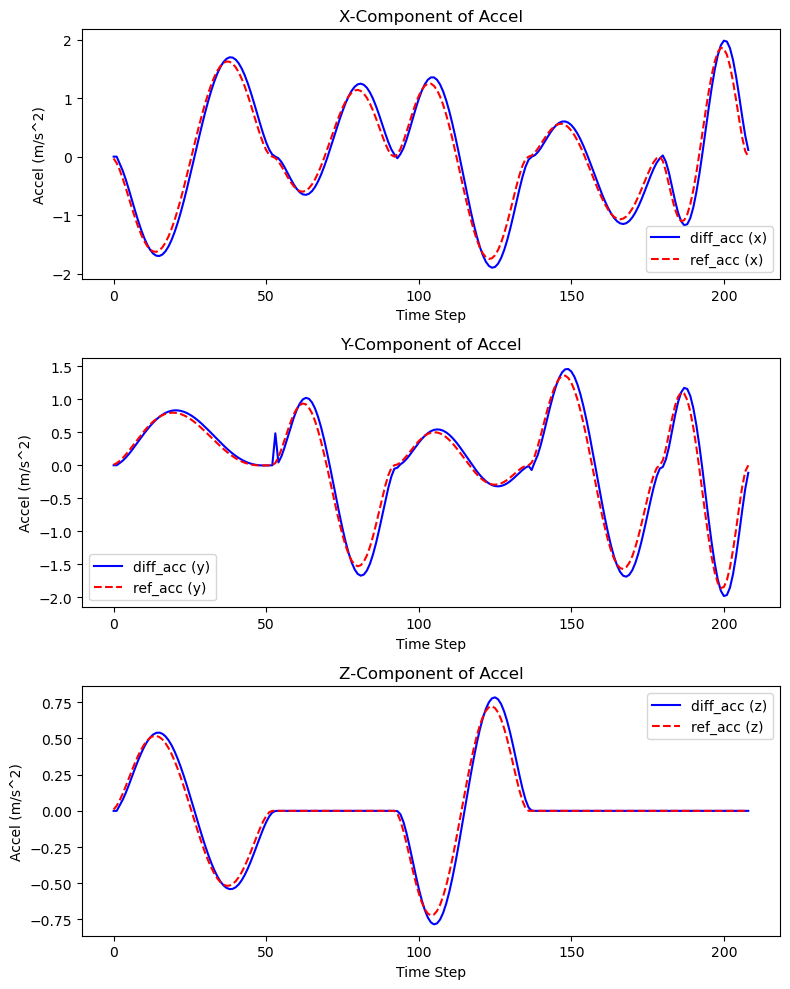

(209, 3) (209, 3)


In [85]:
def compute_accelerations(velocities):
    # Time step between velocity measurements (in seconds)
    delta_t = 1/FREQ
    
    # Compute the difference between consecutive velocities for each dimension
    delta_vx = np.diff(velocities[:, 0])
    delta_vy = np.diff(velocities[:, 1])
    delta_vz = np.diff(velocities[:, 2])
    
    # Calculate acceleration for each dimension: a = delta_velocity / delta_t
    accelerations_x = delta_vx / delta_t
    accelerations_y = delta_vy / delta_t
    accelerations_z = delta_vz / delta_t
    
    # Combine the accelerations into a single array
    accelerations = np.column_stack((accelerations_x, accelerations_y, accelerations_z))
    
    # Add a row of zeros at the beginning to match the shape of the velocities array
    accelerations = np.row_stack((np.array([0, 0, 0]), np.array([0, 0, 0]), accelerations))
    
    return accelerations
diff_acc = compute_accelerations(diff_vel)
# Now, plot comparison for x, y, and z components
# Create figure and subplots for x, y, z components
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plot for x-component (index 0)
axs[0].plot(diff_acc[:, 0], label='diff_acc (x)', color='b')
axs[0].plot(ref_acc[:, 0], label='ref_acc (x)', color='r', linestyle='--')
axs[0].set_title('X-Component of Accel')
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('Accel (m/s^2)')
axs[0].legend()

# Plot for y-component (index 1)
axs[1].plot(diff_acc[:, 1], label='diff_acc (y)', color='b')
axs[1].plot(ref_acc[:, 1], label='ref_acc (y)', color='r', linestyle='--')
axs[1].set_title('Y-Component of Accel')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Accel (m/s^2)')
axs[1].legend()

# Plot for z-component (index 2)
axs[2].plot(diff_acc[:, 2], label='diff_acc (z)', color='b')
axs[2].plot(ref_acc[:, 2], label='ref_acc (z)', color='r', linestyle='--')
axs[2].set_title('Z-Component of Accel')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Accel (m/s^2)')
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
print(ref_acc.shape, diff_acc.shape)
